In [1]:
# 데이터 전처리 및 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

df_train = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(전처리).csv')

In [2]:
df_train.head(2)

,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,여성,55~59,전라남도,20191104,의과외래,정형외과,근골격계통 질환,근골격계통 질환,1,1,0.25,19240,9600,9640,0
1,1,여성,55~59,전라남도,20190806,의과외래,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,1,1,0.25,145680,72800,72880,0


In [3]:
df_dsbjt = pd.DataFrame(df_train['진료과목코드'].value_counts()).reset_index()
df_dsbjt = df_dsbjt.sort_values(by = 'index')
df_dsbjt.columns = ['진료과목', '빈도수(전체환자)']
df_dsbjt.reset_index(inplace = True)
df_dsbjt.drop(['index'], axis = 1, inplace = True)

df_dsbjt_sp1 = pd.DataFrame(df_train[df_train['서식코드'] == '의과입원']['진료과목코드'].value_counts()).reset_index()
df_dsbjt_sp1 = df_dsbjt_sp1.sort_values(by = 'index')
df_dsbjt_sp1.columns = ['진료과목', '빈도수(입원환자)']
df_dsbjt_sp1.reset_index(inplace = True)
df_dsbjt_sp1.drop(['index'], axis = 1, inplace = True)

df_dsbjt_sp2 = pd.DataFrame(df_train[df_train['서식코드'] != '의과입원']['진료과목코드'].value_counts()).reset_index()
df_dsbjt_sp2 = df_dsbjt_sp2.sort_values(by = 'index')
df_dsbjt_sp2.columns = ['진료과목', '빈도수(비입원환자)']
df_dsbjt_sp2.reset_index(inplace = True)
df_dsbjt_sp2.drop(['index'], axis = 1, inplace = True)
df_dsbjt_sp2
df_dsbjt = pd.merge(df_dsbjt, df_dsbjt_sp2, how = 'outer', on = '진료과목')
df_dsbjt = pd.merge(df_dsbjt, df_dsbjt_sp1, how = 'outer', on = '진료과목')
df_dsbjt
# merge_outer = pd.merge(df1,df2, how='outer',on='id')

,진료과목,빈도수(전체환자),빈도수(비입원환자),빈도수(입원환자)
0,가정의학과,379753,361533.0,18220.0
1,결핵과,1086,1017.0,69.0
2,구강악안면외과,10,1.0,9.0
3,내과,4387959,4319462.0,68497.0
4,마취통증의학과,196337,194939.0,1398.0
5,방사선종양학과,10289,10240.0,49.0
6,병리과,73,21.0,52.0
7,비뇨의학과,317961,313643.0,4318.0
8,산부인과,375779,361396.0,14383.0
9,성형외과,15266,13822.0,1444.0


In [4]:
df_dsbjt['빈도수(입원환자)'][np.isnan(df_dsbjt['빈도수(입원환자)'])] = 0 
df_dsbjt['빈도수(비입원환자)'][np.isnan(df_dsbjt['빈도수(비입원환자)'])] = 0 
df_dsbjt['빈도수(입원환자)'] = df_dsbjt['빈도수(입원환자)'].apply(lambda x: int(x))
df_dsbjt['빈도수(비입원환자)'] = df_dsbjt['빈도수(비입원환자)'].apply(lambda x: int(x))

df_dsbjt['빈도수(전체환자)'] == df_dsbjt['빈도수(입원환자)'] + df_dsbjt['빈도수(비입원환자)'] 

<ipython-input-4-70e761cc5b5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsbjt['빈도수(입원환자)'][np.isnan(df_dsbjt['빈도수(입원환자)'])] = 0
<ipython-input-4-70e761cc5b5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsbjt['빈도수(비입원환자)'][np.isnan(df_dsbjt['빈도수(비입원환자)'])] = 0


0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
dtype: bool

In [5]:
y1, y2, y3 = df_dsbjt['빈도수(전체환자)'].sum(), df_dsbjt['빈도수(입원환자)'].sum(), df_dsbjt['빈도수(비입원환자)'].sum()

df_dsbjt['비율(전체환자)'] =  df_dsbjt['빈도수(전체환자)'].apply(lambda x: round((x / y1) * 100, 1))
df_dsbjt['비율(입원환자)'] =  df_dsbjt['빈도수(입원환자)'].apply(lambda x: round((x / y2) * 100, 1))
df_dsbjt['비율(비입원환자)'] =  df_dsbjt['빈도수(비입원환자)'].apply(lambda x: round((x / y3) * 100, 1))
df_dsbjt

,진료과목,빈도수(전체환자),빈도수(비입원환자),빈도수(입원환자),비율(전체환자),비율(입원환자),비율(비입원환자)
0,가정의학과,379753,361533,18220,2.9,6.4,2.8
1,결핵과,1086,1017,69,0.0,0.0,0.0
2,구강악안면외과,10,1,9,0.0,0.0,0.0
3,내과,4387959,4319462,68497,33.3,24.1,33.5
4,마취통증의학과,196337,194939,1398,1.5,0.5,1.5
5,방사선종양학과,10289,10240,49,0.1,0.0,0.1
6,병리과,73,21,52,0.0,0.0,0.0
7,비뇨의학과,317961,313643,4318,2.4,1.5,2.4
8,산부인과,375779,361396,14383,2.9,5.1,2.8
9,성형외과,15266,13822,1444,0.1,0.5,0.1


In [23]:
x = 15
df_dsbjt.sort_values(by = '비율(전체환자)', ascending = False).head(x)

,진료과목,빈도수(전체환자),빈도수(비입원환자),빈도수(입원환자),비율(전체환자),비율(입원환자),비율(비입원환자)
3,내과,4387959,4319462,68497,33.3,24.1,33.5
22,정형외과,2140561,2100772,39789,16.2,14.0,16.3
18,이비인후과,1466074,1460814,5260,11.1,1.9,11.3
13,안과,874455,868336,6119,6.6,2.2,6.7
10,소아청소년과,751840,730986,20854,5.7,7.3,5.7
27,피부과,600112,599709,403,4.6,0.1,4.7
16,외과,417561,393159,24402,3.2,8.6,3.0
8,산부인과,375779,361396,14383,2.9,5.1,2.8
0,가정의학과,379753,361533,18220,2.9,6.4,2.8
21,정신건강의학과,332942,323406,9536,2.5,3.4,2.5


In [19]:
df_dsbjt.sort_values(by = '비율(입원환자)', ascending = False).head(x)

,진료과목,빈도수(전체환자),빈도수(비입원환자),빈도수(입원환자),비율(전체환자),비율(입원환자),비율(비입원환자)
3,내과,4387959,4319462,68497,33.3,24.1,33.5
22,정형외과,2140561,2100772,39789,16.2,14.0,16.3
16,외과,417561,393159,24402,3.2,8.6,3.0
17,응급의학과,122222,101335,20887,0.9,7.4,0.8
10,소아청소년과,751840,730986,20854,5.7,7.3,5.7
12,신경외과,265289,246843,18446,2.0,6.5,1.9
0,가정의학과,379753,361533,18220,2.9,6.4,2.8
20,재활의학과,161725,146418,15307,1.2,5.4,1.1
8,산부인과,375779,361396,14383,2.9,5.1,2.8
11,신경과,230131,219417,10714,1.7,3.8,1.7


In [20]:
df_dsbjt.sort_values(by = '비율(비입원환자)', ascending = False).head(x) 

,진료과목,빈도수(전체환자),빈도수(비입원환자),빈도수(입원환자),비율(전체환자),비율(입원환자),비율(비입원환자)
3,내과,4387959,4319462,68497,33.3,24.1,33.5
22,정형외과,2140561,2100772,39789,16.2,14.0,16.3
18,이비인후과,1466074,1460814,5260,11.1,1.9,11.3
13,안과,874455,868336,6119,6.6,2.2,6.7
10,소아청소년과,751840,730986,20854,5.7,7.3,5.7
27,피부과,600112,599709,403,4.6,0.1,4.7
16,외과,417561,393159,24402,3.2,8.6,3.0
8,산부인과,375779,361396,14383,2.9,5.1,2.8
0,가정의학과,379753,361533,18220,2.9,6.4,2.8
21,정신건강의학과,332942,323406,9536,2.5,3.4,2.5


['가정의학과', '결핵과', '구강악안면외과', '내과', '마취통증의학과', '방사선종양학과', '병리과', '비뇨의학과', '산부인과', '성형외과', '소아청소년과', '신경과', '신경외과', '안과', '영상의학과', '예방의학과', '외과', '응급의학과', '이비인후과', '일반의', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과교정과', '치과보존과', '피부과', '한방내과', '한방응급', '한방재활의학과', '핵의학과', '흉부외과']


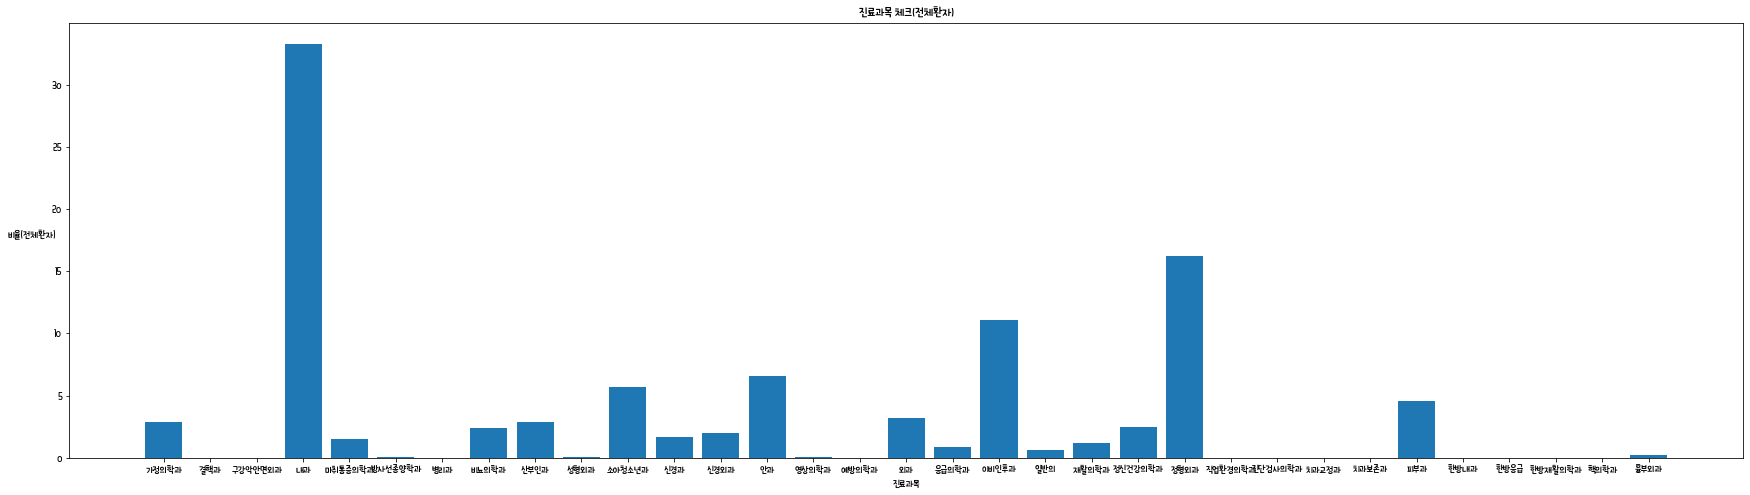

In [43]:
print(list(df_dsbjt['진료과목']))
plt.figure(figsize = (30, 8))
plt.title('진료과목 체크(전체환자)')
plt.bar(df_dsbjt['진료과목'], df_dsbjt['비율(전체환자)'])
# plt.xticks(x, xlabel)
plt.xlabel('진료과목')
plt.ylabel('비율(전체환자)', rotation = 0, labelpad = 20)
plt.show()

['가정의학과', '결핵과', '구강악안면외과', '내과', '마취통증의학과', '방사선종양학과', '병리과', '비뇨의학과', '산부인과', '성형외과', '소아청소년과', '신경과', '신경외과', '안과', '영상의학과', '예방의학과', '외과', '응급의학과', '이비인후과', '일반의', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과교정과', '치과보존과', '피부과', '한방내과', '한방응급', '한방재활의학과', '핵의학과', '흉부외과']


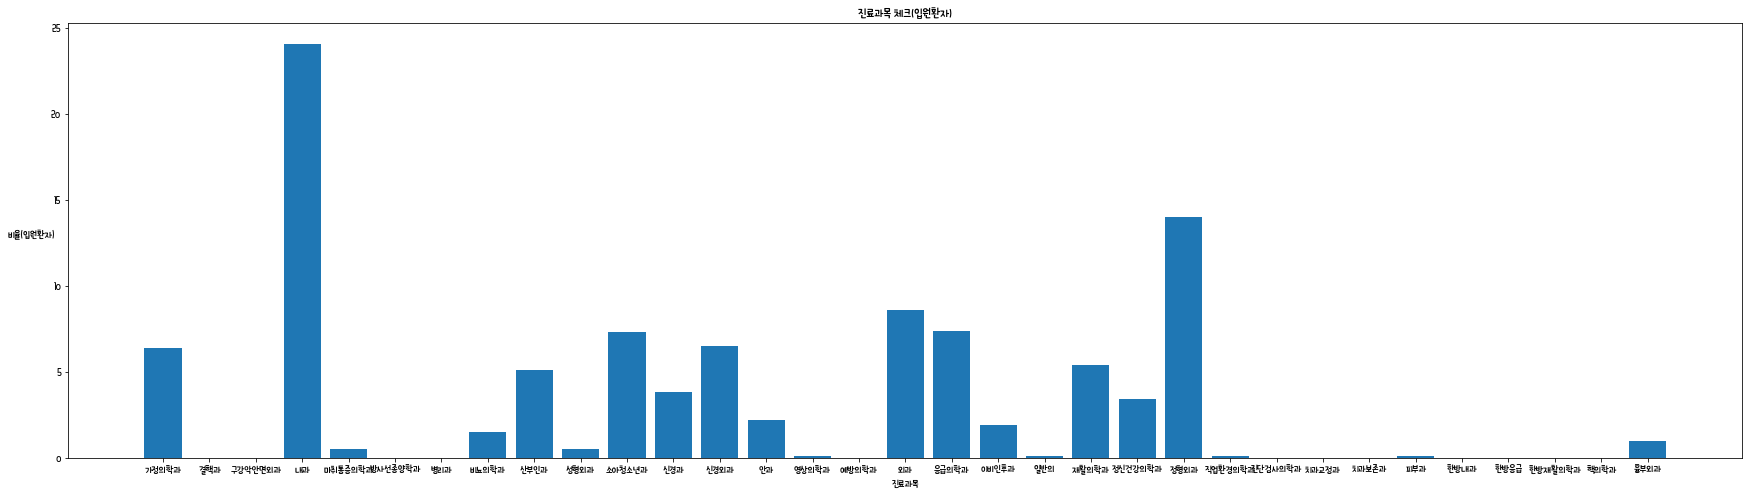

In [44]:
print(list(df_dsbjt['진료과목']))
plt.figure(figsize = (30, 8))
plt.title('진료과목 체크(입원환자)')
plt.bar(df_dsbjt['진료과목'], df_dsbjt['비율(입원환자)'])
# plt.xticks(x, xlabel)
plt.xlabel('진료과목')
plt.ylabel('비율(입원환자)', rotation = 0, labelpad = 20)
plt.show()

['가정의학과', '결핵과', '구강악안면외과', '내과', '마취통증의학과', '방사선종양학과', '병리과', '비뇨의학과', '산부인과', '성형외과', '소아청소년과', '신경과', '신경외과', '안과', '영상의학과', '예방의학과', '외과', '응급의학과', '이비인후과', '일반의', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과교정과', '치과보존과', '피부과', '한방내과', '한방응급', '한방재활의학과', '핵의학과', '흉부외과']


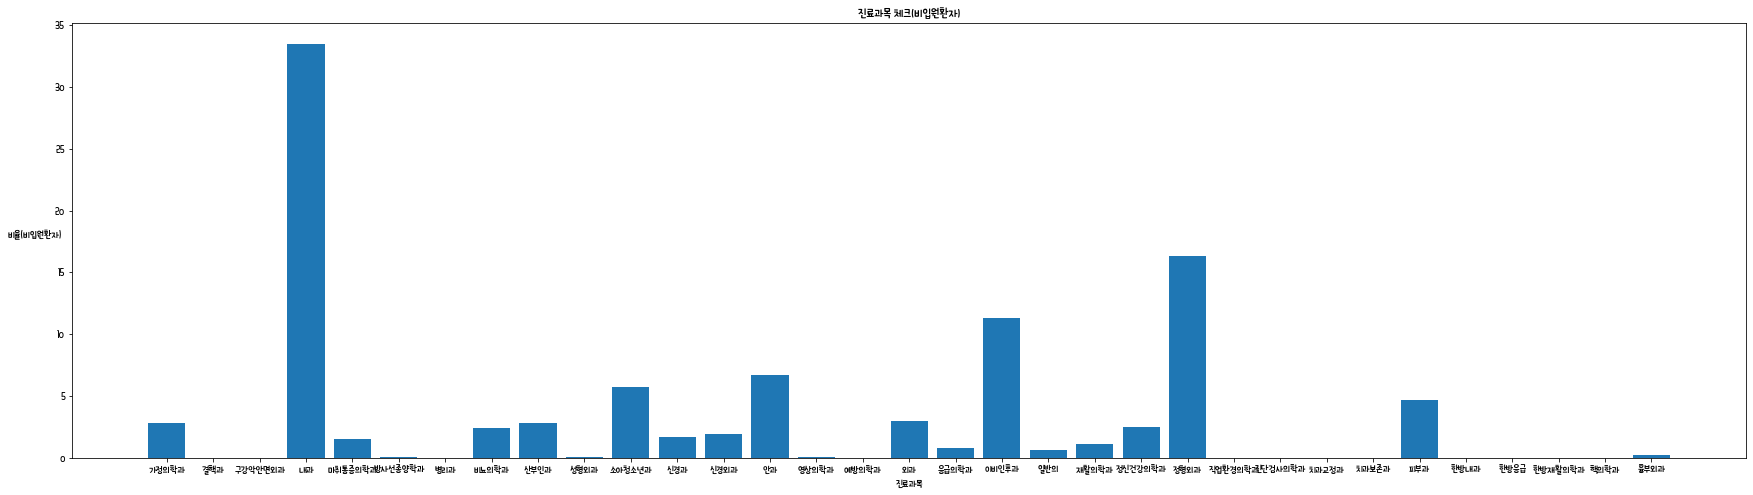

In [45]:
print(list(df_dsbjt['진료과목']))
plt.figure(figsize = (30, 8))
plt.title('진료과목 체크(비입원환자)')
plt.bar(df_dsbjt['진료과목'], df_dsbjt['비율(비입원환자)'])
# plt.xticks(x, xlabel)
plt.xlabel('진료과목')
plt.ylabel('비율(비입원환자)', rotation = 0, labelpad = 20)
plt.show()